In [12]:
## MP 573 Lecture 17: Intro to Wavelets
##
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, Image
import matplotlib.image as mpimg
from os.path import dirname, join as pjoin
import scipy.io as sio
from scipy import signal
import pywt as wt
from skimage.data import shepp_logan_phantom

font = {'weight' : 'normal',
        'size'   : 18}

np.set_printoptions(precision=2)
np.set_printoptions(suppress=True)

## Wavelet decomposition in 1D

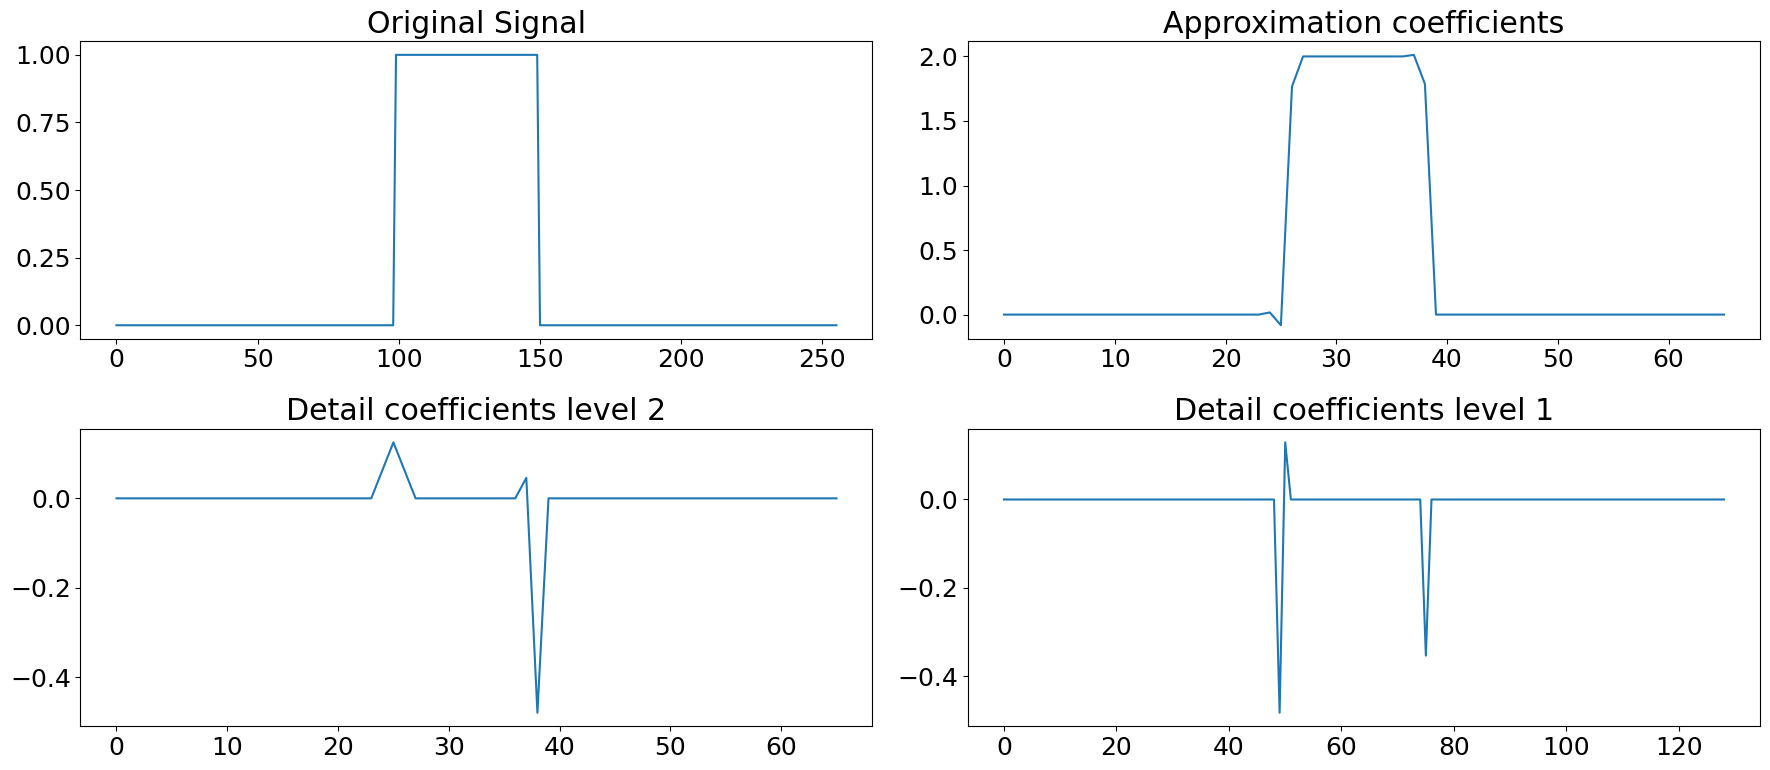

In [13]:
# Generate a simple signal
N = 256
f1 = np.zeros(N)
f1[99:150] = 1.0

# Calculate its wavelet transform
coeffs = wt.wavedec(f1, 'db2',level=2)
cA2, cD2, cD1 = coeffs

# Plot original signal and wavelet decomposition
plt.figure(figsize=(18,8))
plt.rc('font', **font)
plt.subplot(2,2,1)
plt.plot(f1)
plt.title('Original Signal')

plt.subplot(2,2,2)
plt.plot(cA2)
plt.title('Approximation coefficients')

plt.subplot(2,2,3)
plt.plot(cD2)
plt.title('Detail coefficients level 2')

plt.subplot(2,2,4)
plt.plot(cD1)
plt.title('Detail coefficients level 1');
plt.tight_layout(pad=1.0)

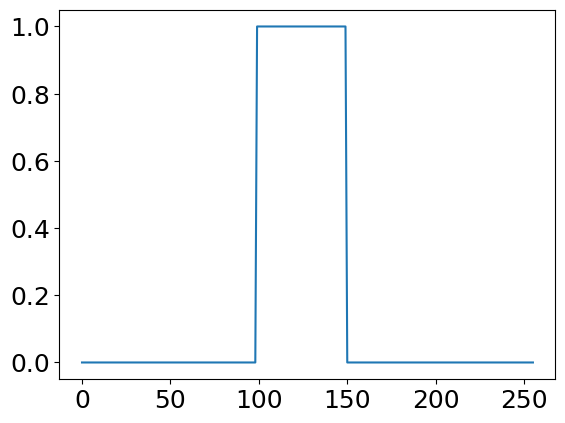

In [14]:
# Reconstruct signal from wavelet coefficients
f2 = wt.waverec(coeffs, 'db2')
plt.plot(f2);

## Wavelet decomposition in 2D

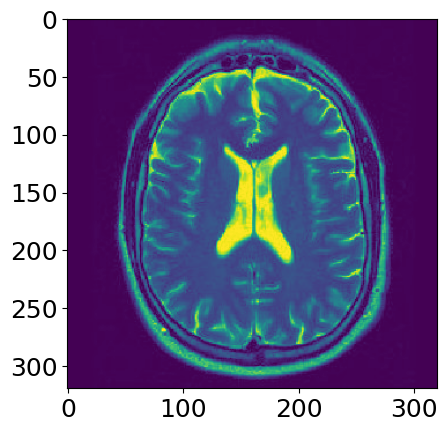

In [15]:
# If data are not here, copy over
import os.path
check_file = os.path.isfile('data/brain_orig.mat')
if check_file == False:
  !wget https://github.com/dherarr/mp573/raw/master/data/brain_orig.mat?raw=true
  !mkdir data
  !mv brain_orig.mat\?raw\=true data/brain_orig.mat

# Load some image from file
data_dir = pjoin('.', 'data')
mat_fname = pjoin(data_dir, 'brain_orig.mat')
mat_contents = sio.loadmat(mat_fname)
mat_contents
f = mat_contents['im_mr']
sx,sy = f.shape
plt.imshow(f)

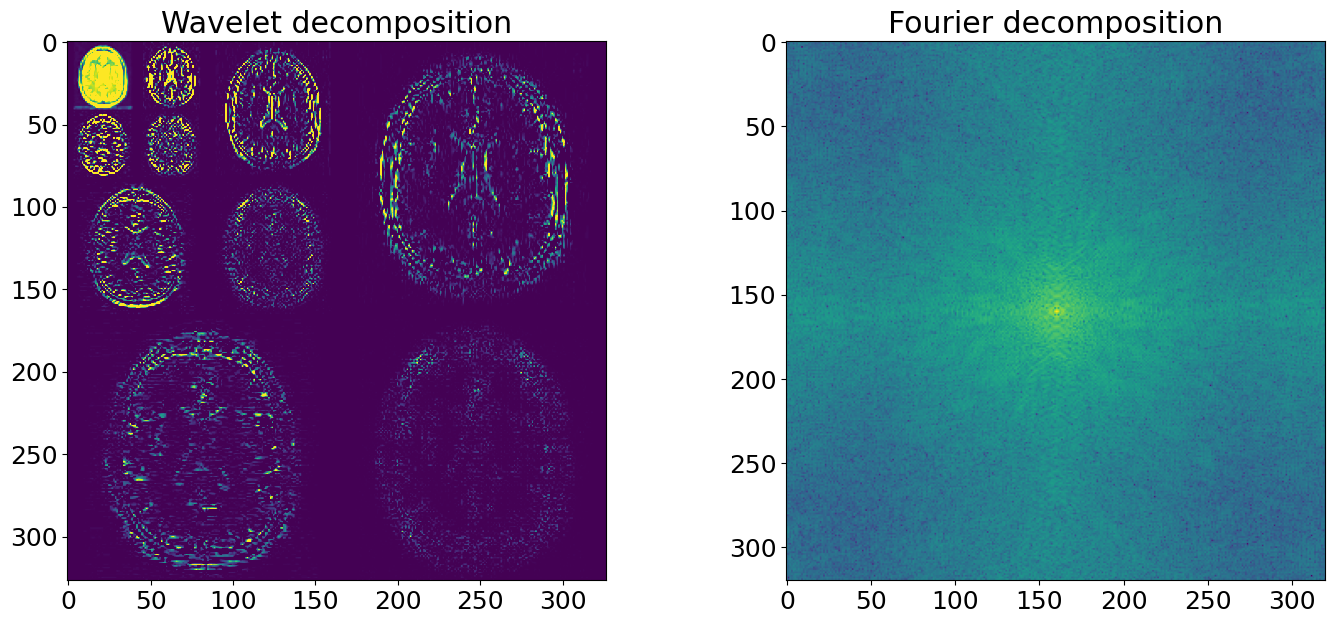

In [16]:
# Wavedec2
nLevels = 3
coeffs = wt.wavedec2(f, 'db2',level=nLevels)
cArray,slices = wt.coeffs_to_array(coeffs)
cArray[0:int(sx/2**nLevels), 0:int(sy/2**nLevels)] = cArray[0:int(sx/2**nLevels), 0:int(sy/2**nLevels)]/10

# DFT
fhat = np.fft.fftshift(np.fft.fftn(np.fft.ifftshift(f)));


# Display wavelet decomposition
plt.figure(figsize=(17,7))
plt.rc('font', **font)
plt.subplot(1,2,1)
plt.imshow(cArray,vmin=0,vmax=0.2)
plt.title('Wavelet decomposition')

# Display DFT
plt.subplot(1,2,2)
plt.imshow(np.log(abs(fhat)))
plt.title('Fourier decomposition');

Text(0.5, 1.0, 'Wavelet decomposition')

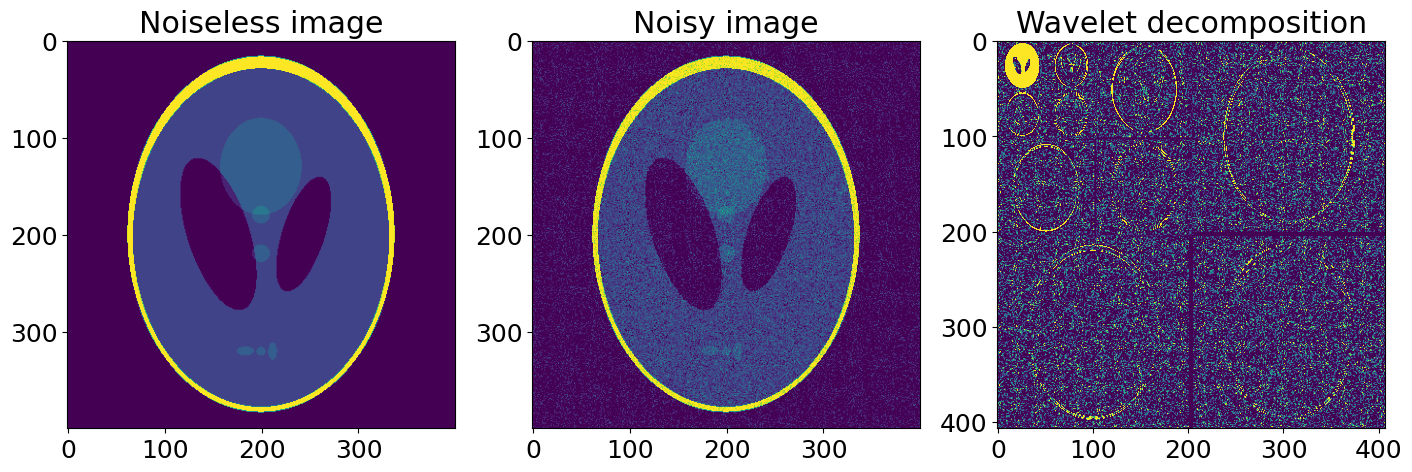

In [17]:
f = shepp_logan_phantom()
sx,sy = f.shape
std = 0.1
noise = np.random.normal(0,std,[sx,sy])
fn = f + noise

# Wavedec2
nLevels = 3
coeffs = wt.wavedec2(fn, 'db2',level=nLevels)
cArray,slices = wt.coeffs_to_array(coeffs)
#cArray[0:int(sx/2**nLevels), 0:int(sy/2**nLevels)] = cArray[0:int(sx/2**nLevels), 0:int(sy/2**nLevels)]/10

# Display
plt.figure(figsize=(17,12))
plt.rc('font', **font)
plt.subplot(2,3,1)
plt.imshow(f,vmin=0,vmax=1)
plt.title('Noiseless image')
plt.subplot(2,3,2)
plt.imshow(fn,vmin=0,vmax=1)
plt.title('Noisy image')
plt.subplot(2,3,3)
plt.imshow(cArray,vmin=0,vmax=0.2)
plt.title('Wavelet decomposition')

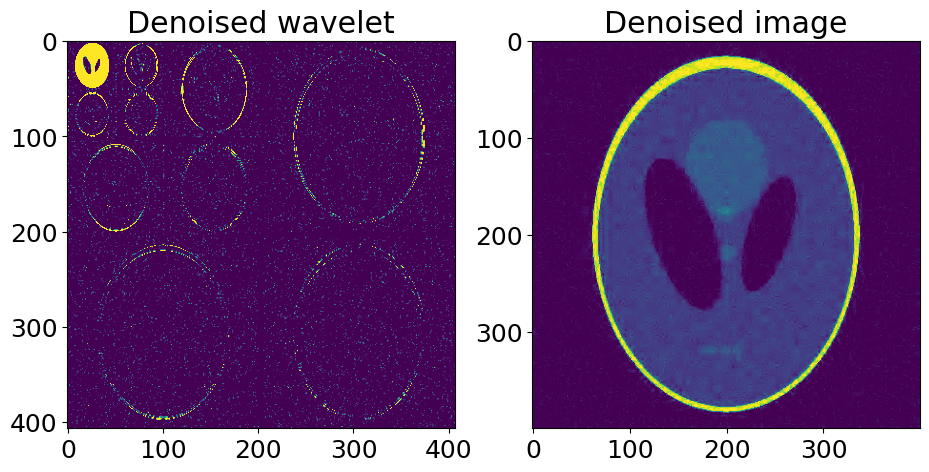

In [18]:
# Do some basic denoising
threshold = 0.15
cArray2 = wt.threshold(cArray,threshold)
coeffs2 = wt.array_to_coeffs(cArray2, slices, output_format='wavedec2')                
f2wav = wt.waverec2(coeffs2, 'db2')
                    
# Display
plt.figure(figsize=(17,12))
plt.rc('font', **font)
plt.subplot(2,3,1)
plt.imshow(cArray2,vmin=0,vmax=0.2)
plt.title('Denoised wavelet')
plt.subplot(2,3,2)
plt.imshow(f2wav,vmin=0,vmax=1)
plt.title('Denoised image');


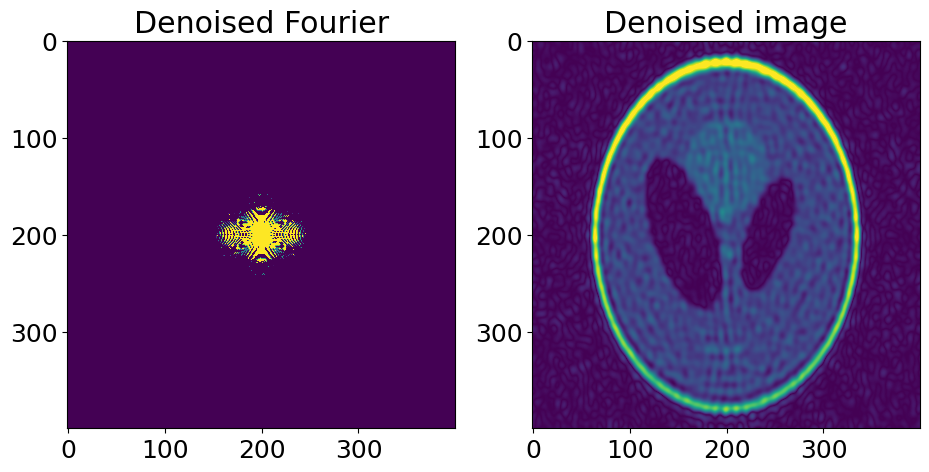

In [23]:
# Try denoising in the Fourier domain
threshold = 0.01
fhat = np.fft.fftshift(np.fft.fftn(np.fft.ifftshift(fn)));
fhat2 = fhat;
maxVal = np.max(np.max(abs(fhat2)))
fhat2[abs(fhat2)<maxVal*threshold] = 0
f2fourier = np.fft.fftshift(np.fft.ifftn(np.fft.ifftshift(fhat2)));

# Display
plt.figure(figsize=(17,12))
plt.rc('font', **font)
plt.subplot(2,3,1)
plt.imshow(np.log(abs(fhat2)+0.0001),vmin=0,vmax=5)
plt.title('Denoised Fourier')
plt.subplot(2,3,2)
plt.imshow(abs(f2fourier),vmin=0,vmax=1)
plt.title('Denoised image');



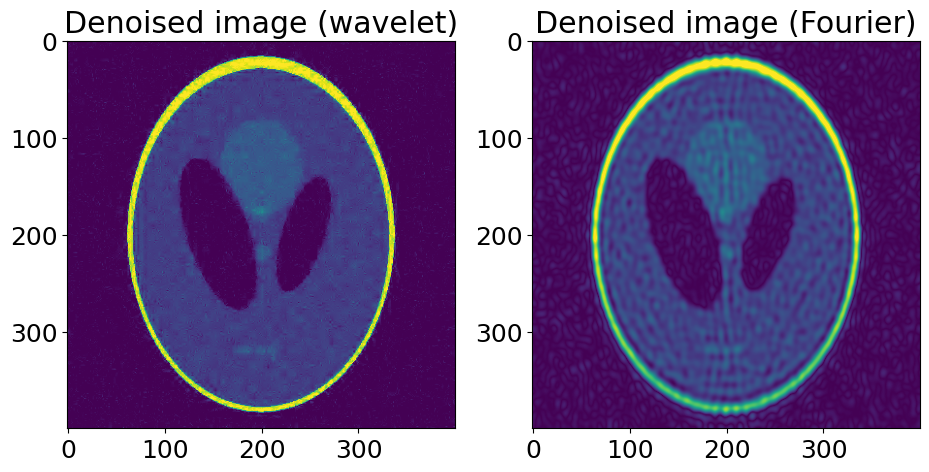

In [24]:
# Display the results of Wavelet and Fourier denoising side by side
plt.figure(figsize=(17,12))
plt.rc('font', **font)
plt.subplot(2,3,1)
plt.imshow(f2wav,vmin=0,vmax=1)
plt.title('Denoised image (wavelet)')
plt.subplot(2,3,2)
plt.imshow(abs(f2fourier),vmin=0,vmax=1)
plt.title('Denoised image (Fourier)');
